In [36]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator
from qiskit.utils import QuantumInstance

import numpy as np

In [37]:
n = 5 #26

# parameters for the encoding unitary U_en
theta1 = np.random.uniform(0, 2*np.pi, n)
theta2 = np.random.uniform(0, 2*np.pi, n)
theta3 = np.random.uniform(0, 2*np.pi, n)

# phase factor phi in e^(i*phi*Jz)
phi = np.pi/4

# parameters for the decoding unitary U_de
theta4 = np.random.uniform(0, 2*np.pi, n)
theta5 = np.random.uniform(0, 2*np.pi, n)
theta6 = np.random.uniform(0, 2*np.pi, n)


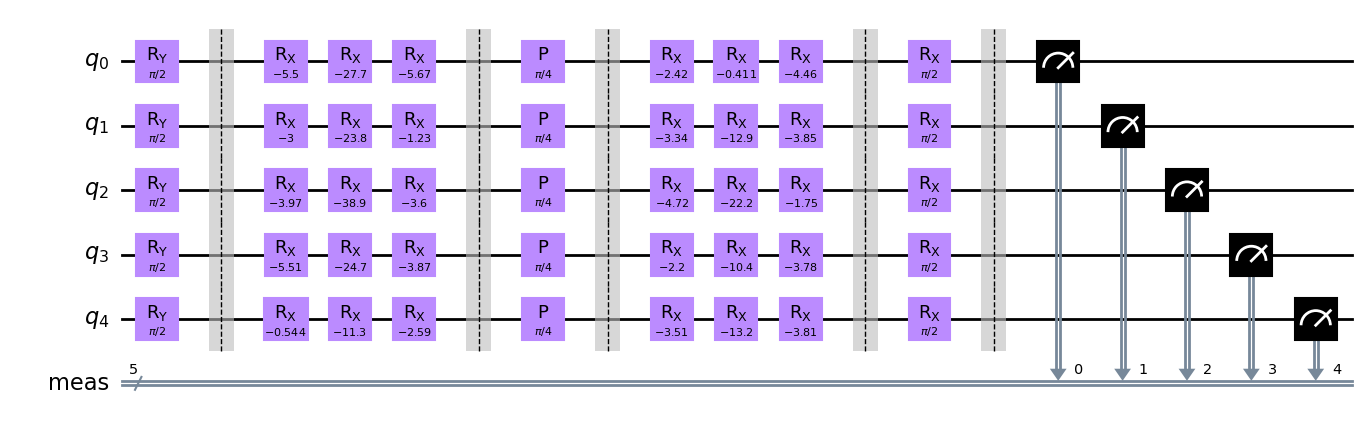

In [38]:
qc = QuantumCircuit(n)

for qubit in range(n):
    qc.ry(np.pi/2, qubit)

qc.barrier()

# Apply the unitary U_en
for qubit in range(n):
    qc.rx(-theta3[qubit], qubit) 
    qc.rx(-theta2[qubit]**2, qubit)
    qc.rx(-theta1[qubit], qubit)

qc.barrier()

# Apply the operator e^(i*phi*Jz) to each qubit
for qubit in range(n):    
    qc.p(phi, qubit)

qc.barrier()

# Apply the decoding unitary U_de
for qubit in range(n):
    qc.rx(-theta6[qubit], qubit)  
    qc.rx(-theta5[qubit]**2, qubit) 
    qc.rx(-theta4[qubit], qubit)

qc.barrier() 

for qubit in range(n):
    qc.rx(np.pi/2, qubit)
    
qc.measure_all()
qc.draw('mpl')

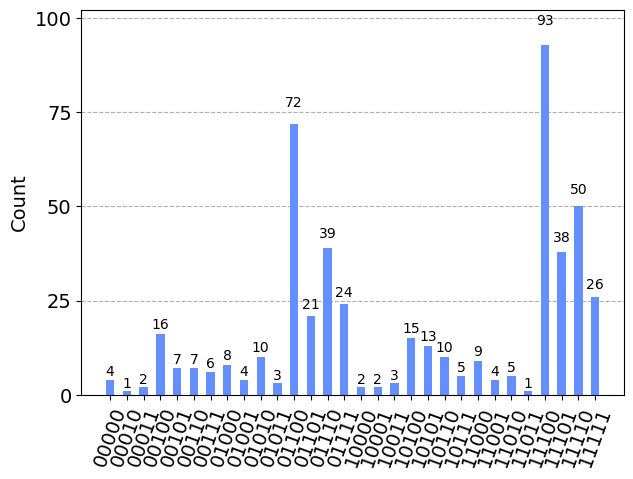

In [40]:
from qiskit.visualization import plot_histogram

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=500)
result = job.result()

# Get counts from the result
counts = result.get_counts(qc)

# Plot the histogram
plot_histogram(counts)
